In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=7c1f1db742127e48d64993dd71a5279120561933be8dd387a50e9deb2df2fda6
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [19]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Task 1: Data Preparation
# Create SparkSession
spark = SparkSession.builder \
    .appName("Boston Housing Analysis") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)

# Preprocess data as needed (handle missing values, etc.)
df = df.dropna()  # Drop rows with missing values



Map Reduce Function

In [21]:

# Mapper function
def mapper(row):
    # Extract relevant columns
    rooms = row["rm"]
    medv = row["medv"]
    return (rooms, (medv, 1))

# Reducer function
def reducer(x, y):
    # Combine values and counts
    total_medv = x[0] + y[0]
    count = x[1] + y[1]
    return (total_medv, count)

# Apply map and reduce
result = df.rdd.map(mapper).reduceByKey(reducer).sortByKey()

# Calculate average MEDV for each bin
result_avg = result.map(lambda x: (x[0], x[1][0]/x[1][1]))

# Convert RDD to list of tuples
result_list = result_avg.collect()

# Convert list of tuples to DataFrame
result_df = spark.createDataFrame(result_list, schema=["rm", "avg_MEDV"])



Results and Analysis


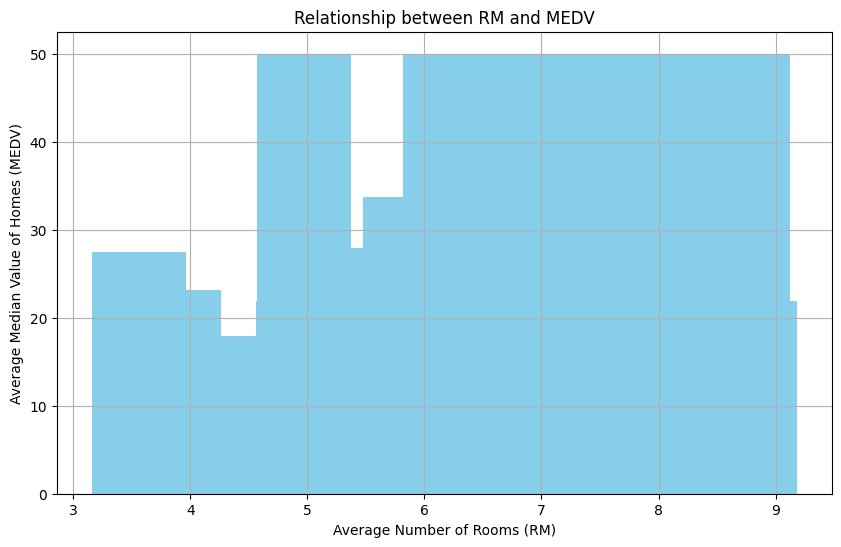

In [22]:

# Convert Spark DataFrame to Pandas DataFrame for visualization
result_pandas = result_df.toPandas()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(result_pandas['rm'], result_pandas['avg_MEDV'], color='skyblue')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Average Median Value of Homes (MEDV)')
plt.title('Relationship between RM and MEDV')
plt.grid(True)
plt.show()

# Stop SparkSession
spark.stop()
